In [18]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('fashion_mnist.csv')
data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [5]:
data["label"].unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1], dtype=int64)

In [6]:
data.shape

(60000, 785)

In [7]:
X = data.drop(columns = ['label'])
y = data['label']

In [8]:
X.shape

(60000, 784)

In [9]:
y.shape

(60000,)

In [10]:
# X = X.reshape((len(X),28,28,1))

In [11]:
X = X.to_numpy()#convert to Numpy array
X = X.reshape((len(X),28,28,1))

In [12]:
X.shape

(60000, 28, 28, 1)

In [13]:
X = X/255

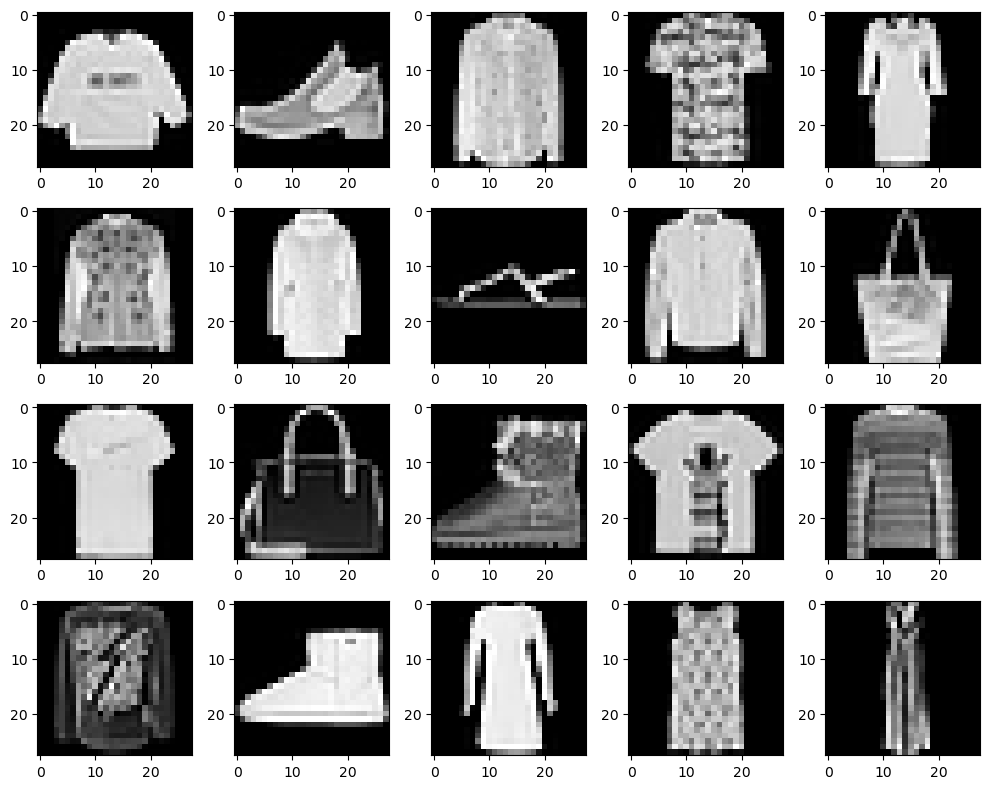

In [15]:
# Plot some of the figure

plt.figure(figsize =(10,8))

for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(X[i], cmap ='gray')
plt.tight_layout()

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [17]:
X_train.shape

(48000, 28, 28, 1)

In [18]:
X_test.shape

(12000, 28, 28, 1)

In [35]:
model = keras.Sequential([
                    keras.layers.Flatten(input_shape = (28,28)),#flatten converting two dimensional to one dimensional (input layer)
                    keras.layers.Dense(128,activation ="relu"), #dense to connecr to previous layer 
                    keras.layers.Dense(64,activation ="relu"), # relu,tanh activation function
                    keras.layers.Dense(64,activation ="tanh"),
                    keras.layers.Dense(10,activation ="sigmoid") #(output layer)
    
])

C:\Users\carol\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
model.compile(optimizer ='adam', loss = 'sparse_categorical_crossentropy',metrics =['accuracy'])

In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 113,546 (443.54 KB)

 Trainable params: 113,546 (443.54 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.fit(X_train,y_train, epochs = 5, validation_split=0.05)

Epoch 1/5
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7558 - loss: 0.6817 - val_accuracy: 0.8583 - val_loss: 0.3894
Epoch 2/5
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8571 - loss: 0.3896 - val_accuracy: 0.8737 - val_loss: 0.3607
Epoch 3/5
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8732 - loss: 0.3458 - val_accuracy: 0.8671 - val_loss: 0.3622
Epoch 4/5
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8804 - loss: 0.3217 - val_accuracy: 0.8800 - val_loss: 0.3332
Epoch 5/5
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8863 - loss: 0.3045 - val_accuracy: 0.8846 - val_loss: 0.3257


In [45]:
model.evaluate(X_train,y_train)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 977us/step - accuracy: 0.8942 - loss: 0.2866


[0.28517186641693115, 0.8942083120346069]

In [47]:
prediction = model.predict(X_test)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step


# create a dictionary with key from 0 to 1 and values of labels

In [56]:
labels_dict = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle Boot'}
labels_dict

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle Boot'}

# Store all predicted values as numbers in a list

In [59]:
predicted_values = [np.argmax(i) for i in prediction]
predicted_values

[7,
 3,
 5,
 1,
 6,
 2,
 7,
 6,
 1,
 7,
 9,
 7,
 4,
 4,
 7,
 2,
 9,
 0,
 2,
 2,
 8,
 0,
 0,
 8,
 9,
 9,
 3,
 0,
 7,
 6,
 1,
 5,
 7,
 9,
 6,
 2,
 8,
 0,
 3,
 7,
 4,
 7,
 7,
 0,
 9,
 3,
 1,
 8,
 1,
 3,
 9,
 2,
 1,
 3,
 2,
 6,
 0,
 7,
 2,
 2,
 6,
 6,
 7,
 2,
 9,
 0,
 7,
 2,
 4,
 6,
 1,
 9,
 5,
 2,
 2,
 7,
 6,
 4,
 9,
 4,
 6,
 8,
 5,
 0,
 2,
 8,
 3,
 1,
 7,
 4,
 0,
 4,
 6,
 1,
 2,
 6,
 2,
 4,
 5,
 0,
 2,
 2,
 1,
 6,
 5,
 1,
 5,
 7,
 4,
 5,
 5,
 1,
 1,
 2,
 8,
 5,
 4,
 0,
 6,
 2,
 9,
 8,
 5,
 4,
 4,
 2,
 0,
 4,
 0,
 3,
 7,
 9,
 7,
 5,
 5,
 9,
 0,
 2,
 6,
 8,
 6,
 7,
 7,
 4,
 3,
 9,
 4,
 6,
 9,
 6,
 7,
 3,
 0,
 2,
 5,
 7,
 5,
 1,
 3,
 9,
 0,
 6,
 8,
 2,
 5,
 8,
 7,
 1,
 1,
 7,
 3,
 5,
 3,
 1,
 4,
 1,
 8,
 2,
 9,
 1,
 7,
 0,
 3,
 3,
 6,
 6,
 3,
 1,
 4,
 3,
 2,
 3,
 0,
 8,
 2,
 9,
 0,
 0,
 9,
 2,
 7,
 5,
 1,
 4,
 2,
 2,
 8,
 0,
 4,
 6,
 4,
 7,
 3,
 1,
 9,
 5,
 7,
 2,
 3,
 8,
 7,
 2,
 3,
 7,
 4,
 9,
 4,
 9,
 7,
 4,
 8,
 9,
 7,
 6,
 8,
 2,
 0,
 9,
 2,
 5,
 7,
 6,
 7,
 6,
 1,
 9,
 8,
 1,
 1,
 0,


In [61]:
# plot the first few figures in X_test along with its labels from y_test

y_test

16820    7
3704     3
13429    5
26187    1
15899    6
        ..
18929    6
41747    5
37305    5
38620    5
43871    0
Name: label, Length: 12000, dtype: int64

In [63]:
y_test.reset_index(drop = True, inplace = True)

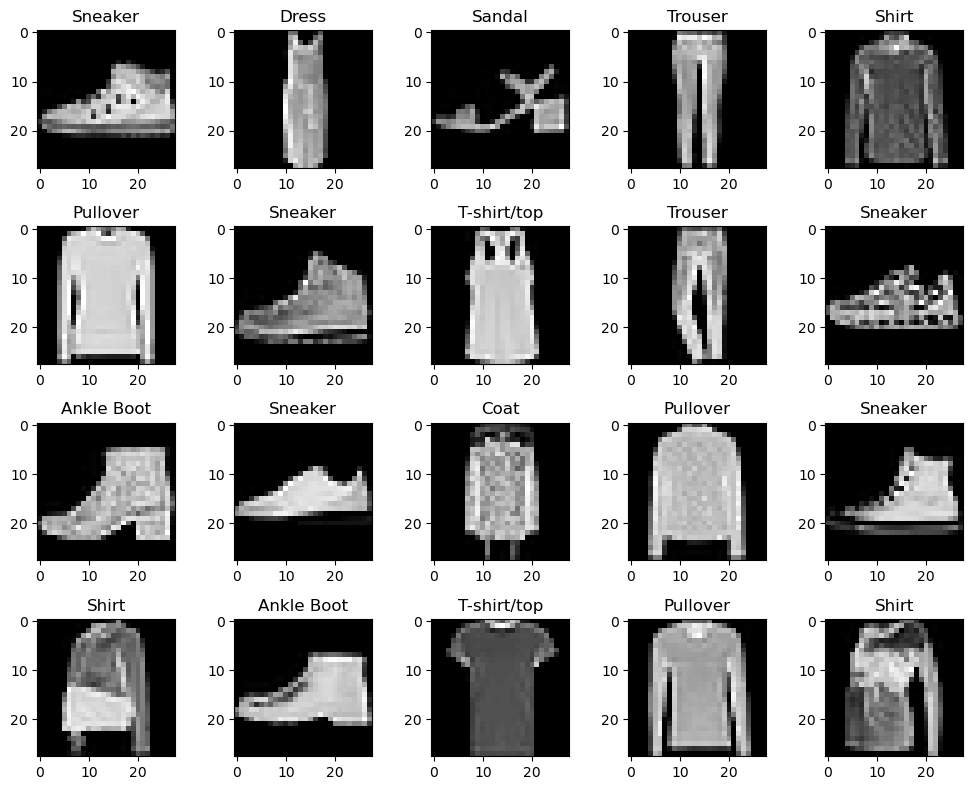

In [65]:
#Now plot the figures from x_test with the labels from our actual values

plt.figure(figsize = (10,8))

for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(X_test[i], cmap ='gray')
    plt.title(labels_dict[y_test[i]])

plt.tight_layout()

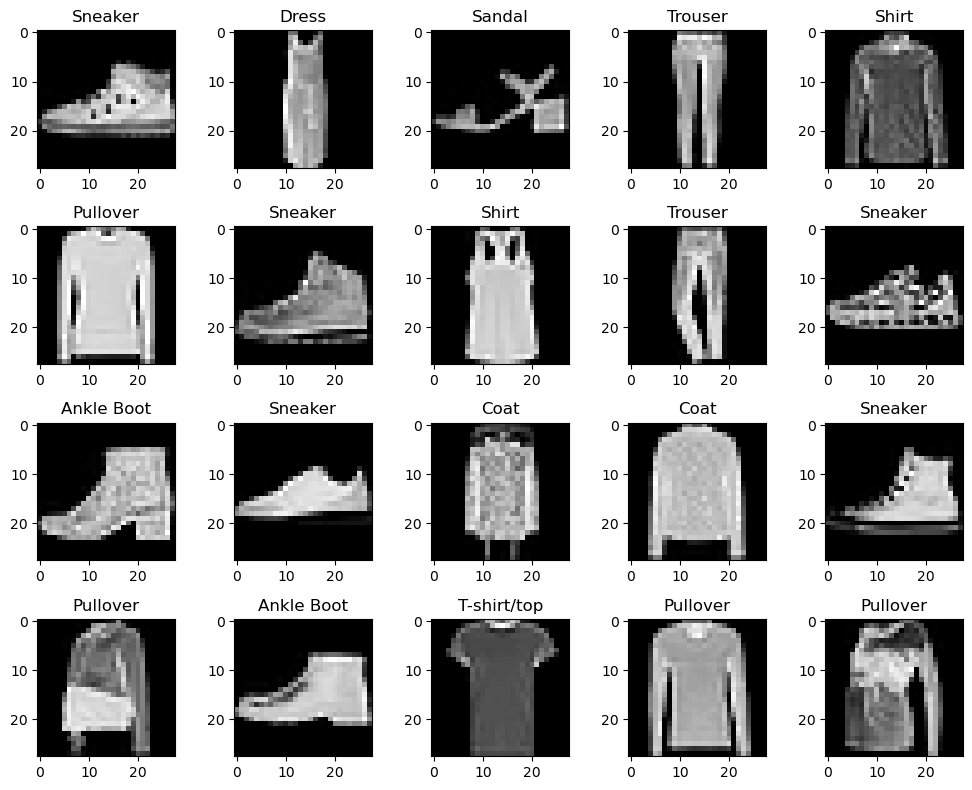

In [69]:
#now plot the figures from x_test with labels from our predicted values

plt.figure(figsize =(10,8))

for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(X_test[i],cmap ='gray')
    plt.title(labels_dict[predicted_values[i]])
plt.tight_layout()

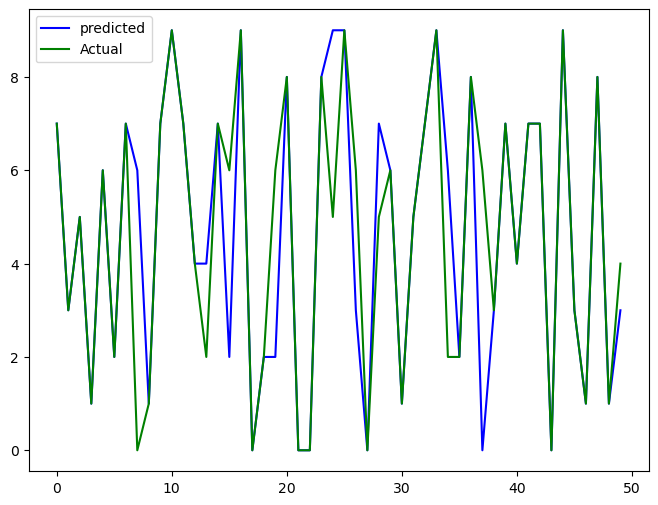

In [73]:
#plot the accuracy of our prediction

a = range(len(predicted_values))

plt.figure(figsize =(8,6))

plt.plot(a[:50], predicted_values[:50], color = 'blue')
plt.plot(a[:50], y_test[:50], color = 'green')

plt.legend(['predicted', 'Actual'])

plt.show()

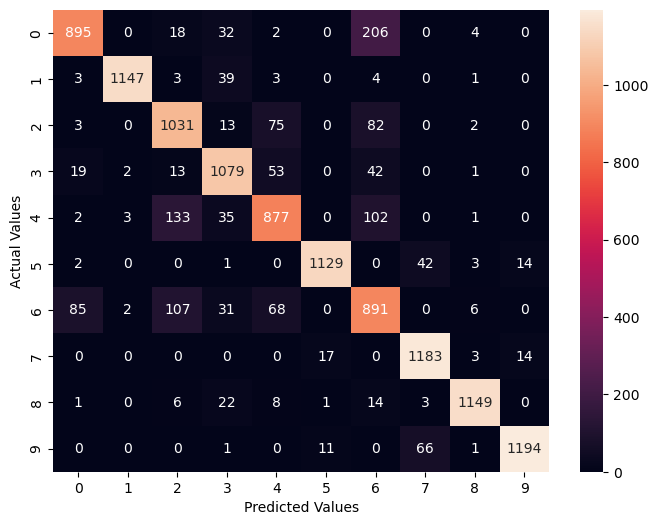

In [75]:
#plot confusion matrix on a heatmap

plt.figure(figsize =(8,6))

sns.heatmap(confusion_matrix(y_test,predicted_values), annot = True, fmt = 'd')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()